# Puzzlingly high correlations between genomics-y things

## Observation

In computing correlations between landscapes of diversity and divergence in great apes, we found some exceptionally high correlations. Below, I plotted the correlations between landscapes of divergence and diversity acros the great apes (on the y-axis), against the time until the most common recent ancestor (note that for $d_{\text{XY}}$ this is computed from the MRCA of the two populations). We found puzzling that all the $d_{\text{XY}}$s whose MRCA was the great-apes had similarly high correlations (see below the red points near perfect correlation with $dT=0$).

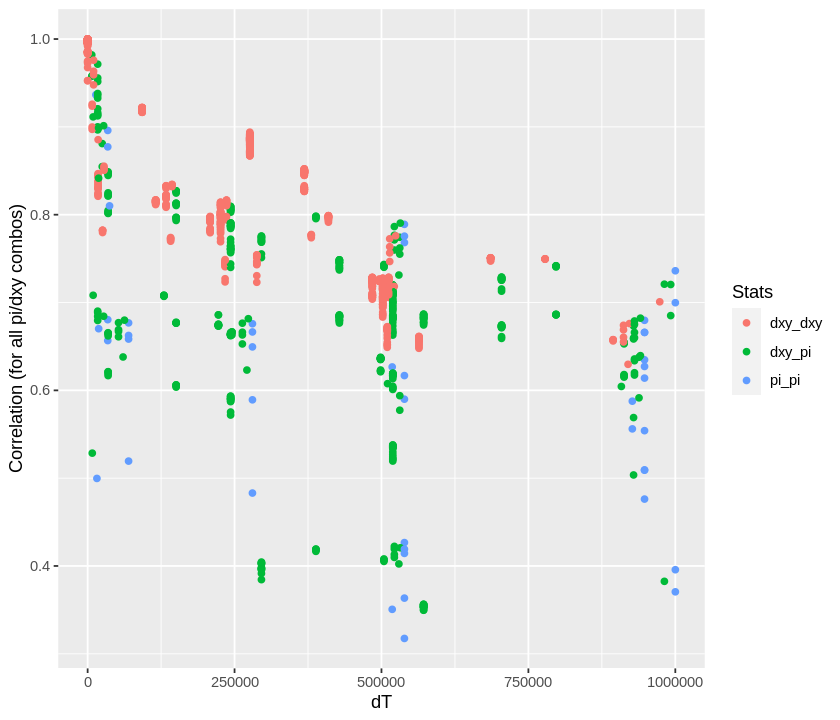

In [8]:
options(repr.plot.width=7, repr.plot.height=6)
options(warn=-1)
library(ggplot2)
library(plotly)
longcor = readRDS("../../output/figs/long-cor_great_apes_diversity_data_win-size=1000000_merged-mask=True_prop_acc=0.4.rds")
p = ggplot(longcor, aes(y=value, x=dt, col=statcombo, label=stat_combo1, label2=stat_combo2)) + geom_point() +
    labs(x="dT", y="Correlation (for all pi/dxy combos)", col="Stats")
#ggplotly(p, width=500, height=400)
p

For example, the correlation between orang-gor dXY and orang-chimp dXY is 0.995!

In [2]:
head(longcor[longcor$stat1=="dxy" & longcor$stat2=="dxy" & longcor$mrca1=="great-apes" & longcor$mrca2=="great-apes",], n=1)

,stat_combo1,stat_combo2,value,mrca1,stat1,mrca2,stat2,granmrca,dt,statcombo
,<chr>,<chr>,<dbl>,<fct>,<chr>,<fct>,<chr>,<chr>,<dbl>,<chr>
113,dxy_bornean-orangutan western-gorilla,dxy_bornean-orangutan central-chimp,0.9955689,great-apes,dxy,great-apes,dxy,great-apes,0,dxy_dxy


## Theory

Recall we can think of $d_{\text{XY}}$ between populations A and B as:

$$d_{\text{XY}}(\text{A, B}) = \pi_{\text{anc}} + \mu * T$$

where $\pi_{\text{anc}}$ is diversity in the MRCA of A and B, and $T$ is distance between nodes A and B.

ggtree v3.0.1  For help: https://yulab-smu.top/treedata-book/

If you use ggtree in published research, please cite the most appropriate paper(s):

1. Guangchuang Yu. Using ggtree to visualize data on tree-like structures. Current Protocols in Bioinformatics, 2020, 69:e96. doi:10.1002/cpbi.96
2. Guangchuang Yu, Tommy Tsan-Yuk Lam, Huachen Zhu, Yi Guan. Two methods for mapping and visualizing associated data on phylogeny using ggtree. Molecular Biology and Evolution 2018, 35(12):3041-3043. doi:10.1093/molbev/msy194
3. Guangchuang Yu, David Smith, Huachen Zhu, Yi Guan, Tommy Tsan-Yuk Lam. ggtree: an R package for visualization and annotation of phylogenetic trees with their covariates and other associated data. Methods in Ecology and Evolution 2017, 8(1):28-36. doi:10.1111/2041-210X.12628





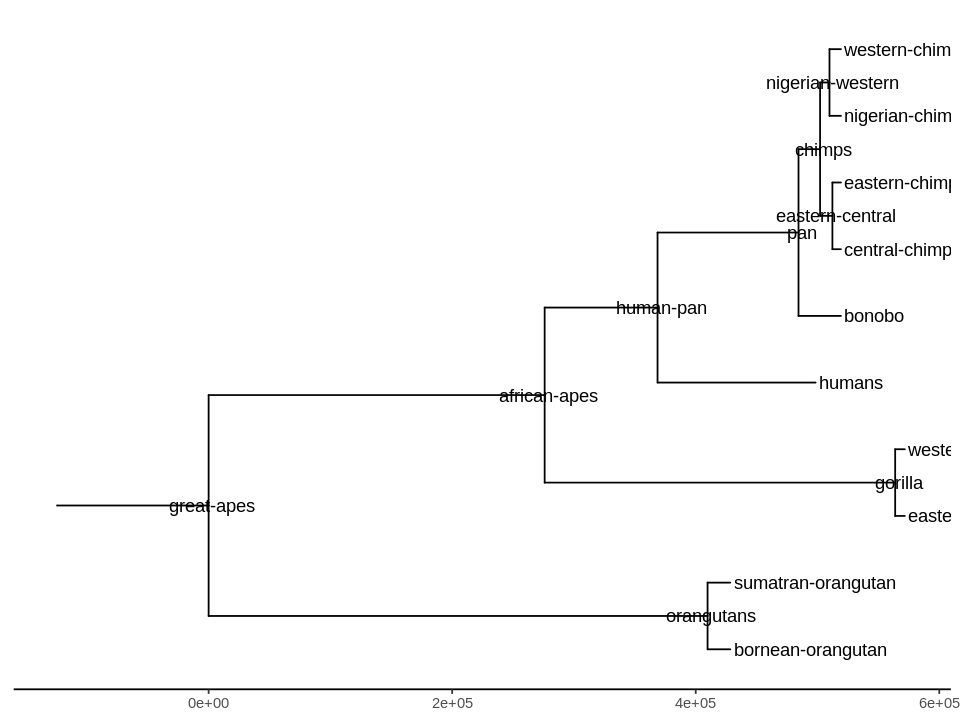

In [3]:
options(repr.plot.width=8, repr.plot.height=6)
library(ggtree)
tree = read.tree("../../output/ga.nwk")
ggtree(tree) + geom_tiplab() + geom_nodelab()+ geom_rootedge()+ theme_tree2()

Thus, in our comparisons of interest we have:

$$ d_{\text{XY}}(\text{orang,gor}) = \pi_{\text{great-apes}} + \mu * (T_{\text{orang-to-great-apes}} + T_{\text{african-apes-to-great-apes}} + T_{\text{gorilla-to-african-apes}})$$

and 

$$ d_{\text{XY}}(\text{orang,chimp}) = \pi_{\text{great-apes}} + \mu * (T_{\text{orang-to-great-apes}} + T_{\text{african-apes-to-great-apes}} + T_{\text{chimp-to-african-apes}})$$

Note that these two $d_{\text{XY}}$s share some history:

$$T_{\text{shared}} = T_{\text{orang-to-great-apes}} + T_{\text{african-apes-to-great-apes}} \approx 7\times10^5$$

$$T_{\text{diff}} = T_{\text{chimp-to-african-apes}} \approx T_{\text{gorilla-to-african-apes}} \approx 3\times10^5 $$

## Simulations

Let's simulate the number of mutations in the ancestor and in each branch over 100 genomic windows and compute the expected correlation between the landscapes of divergence. To do so, we assume mutations occur following a poisson distribution with $\lambda$ equal to the product of the mutation rate, length of the window and branch lengths. We picked a mutation rate so that the divergences are similar to what we see in the data.

[1] 0.771678

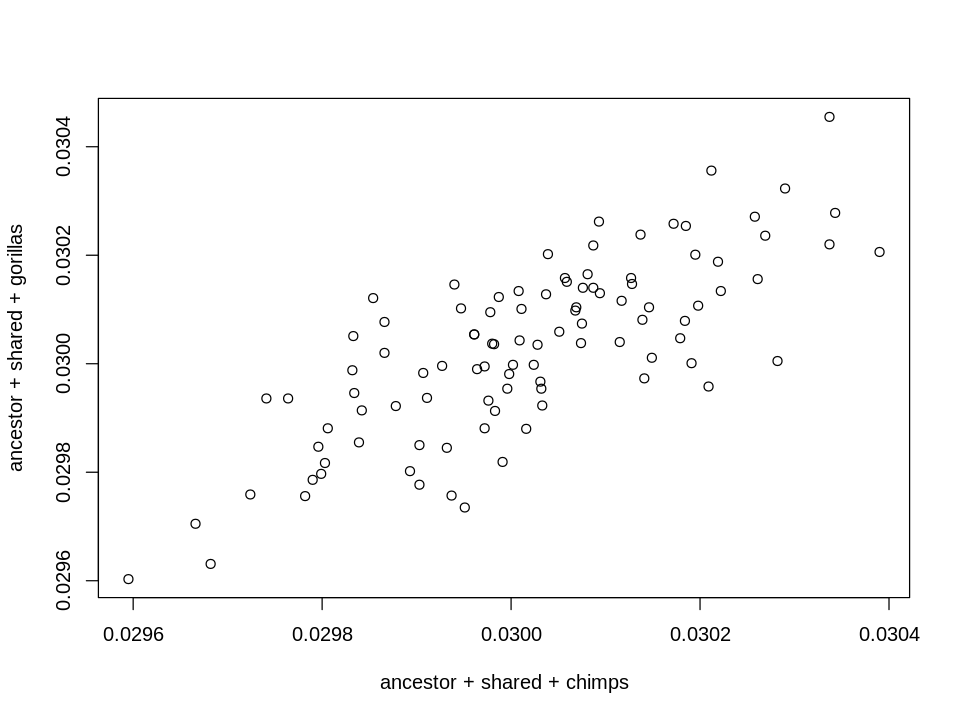

In [4]:
# mut rate * L (winsize) * 2*N
ancestor = rpois(100, 2.5e-8 * 1e6 * 2 * 100e3)/1e6
# same, but with branch length
shared = rpois(100, 2.5e-8 * 1e6 * 7 * 1e5)/1e6
chimps = rpois(100, 2.5e-8 * 1e6 * 3 * 1e5)/1e6
gorillas = rpois(100, 2.5e-8 * 1e6 * 3 * 1e5)/1e6

cor(ancestor+shared+chimps, ancestor+shared+gorillas)
plot(ancestor+shared+chimps, ancestor+shared+gorillas)

Now we do the same thing, except we induce some correlation between the branches due to variation in "effective mutation rate" along the windows.

[1] 0.9997581

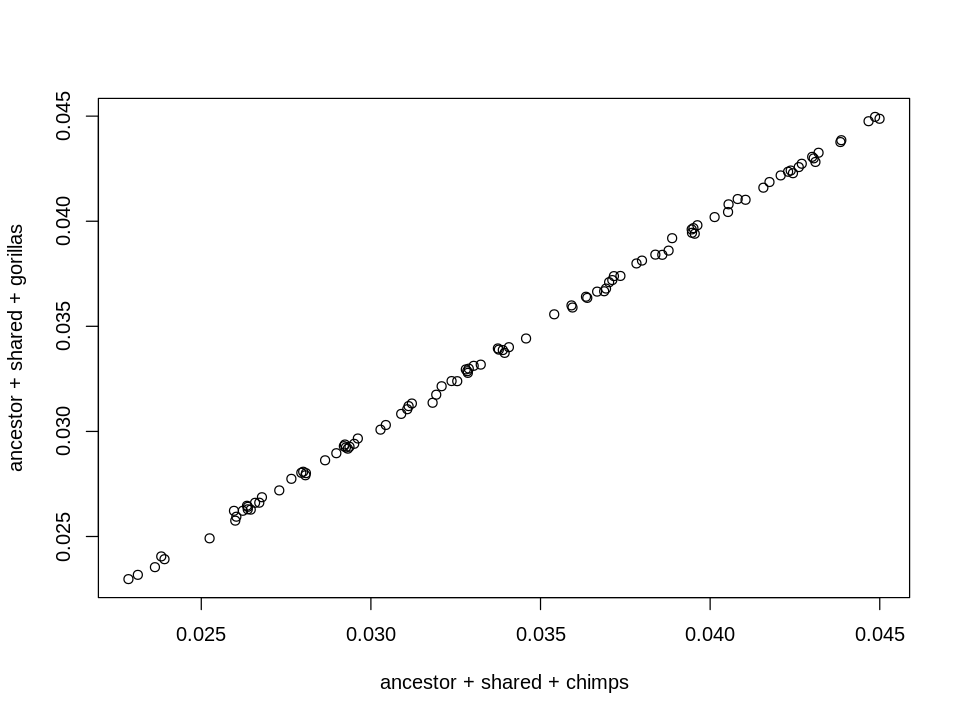

In [5]:
# inducing some variation in 'mutation rate' which is shared by all
mu = (1 + runif(100)) * 0.75
# mut rate * L (winsize) * 2*N
ancestor = rpois(100, 2.5e-8 * 1e6 * 2 * 100e3 * mu)/1e6
# same, but with branch length
shared = rpois(100, 2.5e-8 * 1e6 * 7 * 1e5 * mu)/1e6
chimps = rpois(100, 2.5e-8 * 1e6 * 3 * 1e5 * mu)/1e6
gorillas = rpois(100, 2.5e-8 * 1e6 * 3 * 1e5 * mu)/1e6

cor(ancestor+shared+chimps, ancestor+shared+gorillas)
plot(ancestor+shared+chimps, ancestor+shared+gorillas)

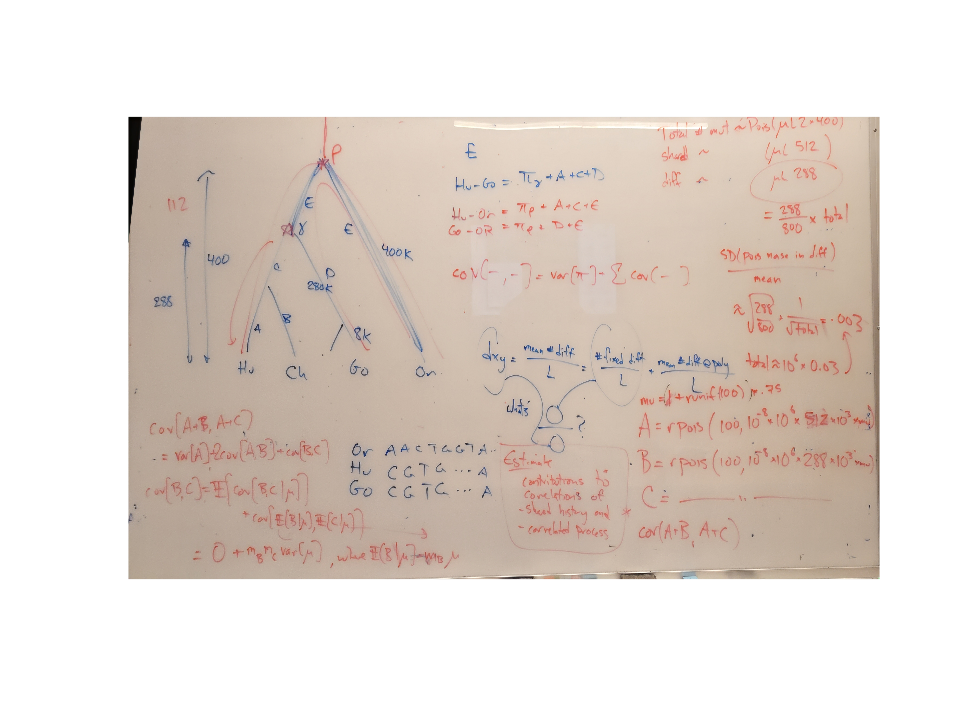

In [6]:
library("jpeg")
jj <- readJPEG("../../misc/why_high_correlations_whiteboard.jpeg",native=TRUE)
plot(0:1,0:1,type="n",ann=FALSE,axes=FALSE)
rasterImage(jj,0,0,1,1)